# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [9]:
# INSERT CODE HERE
library(class)
library(tidyverse)
d1<-diamonds
#head(d1)

mean_price<-mean(as.numeric(d1$price))
mean_price
d1<-d1 %>%
  mutate(price_bin = if_else(price > mean_price, 1, 0))
d1$price_bin<-as.factor(d1$price_bin)
head(d1)
#check price split worked appropriately
#ggplot(d1,aes(x=price,y=price_bin,col=price_bin)) +
# geom_point(size=2)

[1] 3932.8

carat,cut,color,clarity,depth,table,price,x,y,z,price_bin
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,0
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0


### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

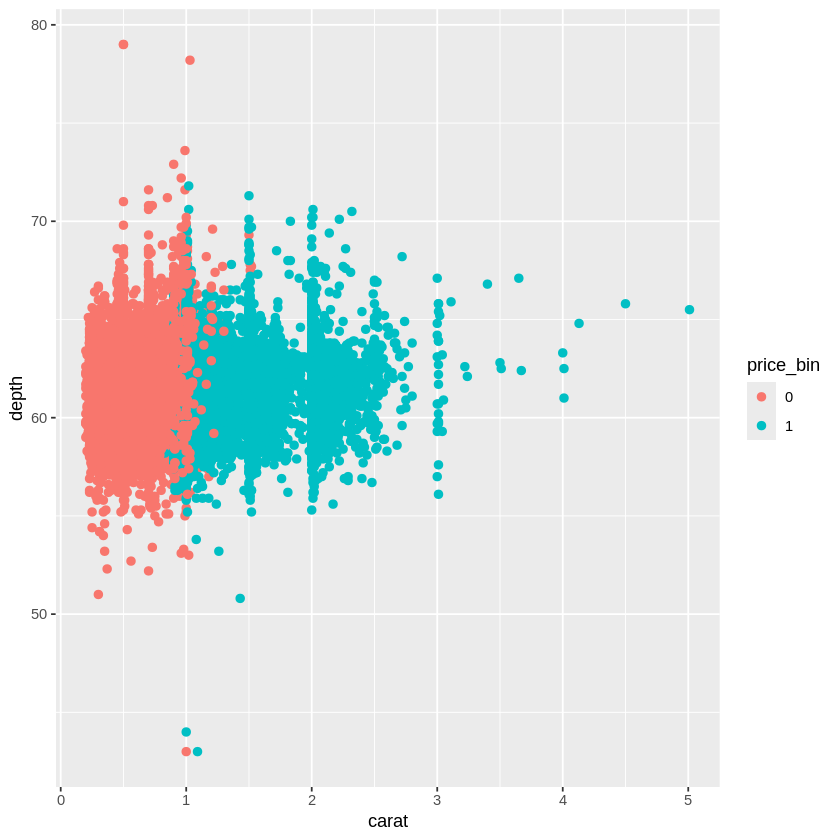

In [10]:
# INSERT CODE HERE
ggplot(d1,aes(x=carat,y=depth,col=price_bin)) +
 geom_point(size=2)

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> * *Write response here*
>
> * It looks like kNN will perform pretty well, there doesn't look to be much overlap in the space of these 2 variables (in terms of how price_bin is distirbuted) -- it looks like most of the price_bin=0 are neighboring other price_bin=0 and likewise for price_bin=1.


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [12]:
set.seed(2023)

# INSERT CODE HERE


#pull random sample of 30% of row indices
test.inds <- sample(1:nrow(d1),0.3*nrow(d1))

# TRUE/FALSE indicator for whether each observation is a test item or not.
d1$is.test <- 1:nrow(d1) %in% test.inds
head(d1)

test_d1<-d1[d1$is.test==TRUE,]
head(test_d1)
dim(test_d1)
train_d1<-d1[d1$is.test==FALSE,]
head(train_d1)
dim(train_d1)

cat("proportion allocated to test dataset:", dim(test_d1)[1]/(dim(test_d1)[1]+dim(train_d1)[1]))

carat,cut,color,clarity,depth,table,price,x,y,z,price_bin,is.test
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0,FALSE
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,0,TRUE
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0,FALSE
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0,FALSE
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0,FALSE
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0,FALSE


carat,cut,color,clarity,depth,table,price,x,y,z,price_bin,is.test
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,0,TRUE
0.30,Good,J,SI1,64.0,55,339,4.25,4.28,2.73,0,TRUE
0.30,Ideal,I,SI2,62.0,54,348,4.31,4.34,2.68,0,TRUE
0.30,Good,J,SI1,63.4,54,351,4.23,4.29,2.70,0,TRUE
0.30,Very Good,J,SI1,62.7,59,351,4.21,4.27,2.66,0,TRUE
0.23,Very Good,E,VS2,63.8,55,352,3.85,3.92,2.48,0,TRUE


[1] 16182    12

carat,cut,color,clarity,depth,table,price,x,y,z,price_bin,is.test
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0,FALSE
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0,FALSE
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0,FALSE
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0,FALSE
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0,FALSE
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47,0,FALSE


[1] 37758    12

proportion allocated to test dataset: 0.3

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [13]:
set.seed(2023)
# INSERT CODE HERE

#training data pulls the "not test" rows
train.preds <- cbind(d1$carat[-test.inds], d1$depth[-test.inds])
train.spec <- d1$price_bin[-test.inds]
#testing data pulls the test rows
test.preds <- cbind(d1$carat[test.inds], d1$depth[test.inds])

#run knn
test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)

#print first 10 test specifications
test.spec.knn[1:10]

[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [14]:
# INSERT CODE HERE
confusion_df <- data.frame(predicted = test.spec.knn,actual = d1$price_bin[test.inds])
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))
print(paste("Test error:",1-mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    0    1
        0 9707  316
        1  539 5620

[1] "---"
[1] "Accuracy: 0.947163515016685"
[1] "Test error: 0.0528364849833148"


How did your model perform?
> * Write your response here
>
> * The model performed very well with a high rate of accuracy predicting price_bin correctly for ~95% of the test cases using carat and depth.


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [15]:
set.seed(2023)
# INSERT CODE HERE
#training data pulls the "not test" rows
all.train.preds <-cbind(d1$carat[-test.inds],
                        d1$cut[-test.inds],
                        d1$color[-test.inds],
                        d1$clarity[-test.inds],
                        d1$depth[-test.inds],
                        d1$table[-test.inds],
                        d1$price[-test.inds],
                        d1$x[-test.inds],
                        d1$y[-test.inds],
                        d1$z[-test.inds])
all.train.spec <- d1$price_bin[-test.inds]
#testing data pulls the test rows
all.test.preds <- cbind(d1$carat[test.inds],
                        d1$cut[test.inds],
                        d1$color[test.inds],
                        d1$clarity[test.inds],
                        d1$depth[test.inds],
                        d1$table[test.inds],
                        d1$price[test.inds],
                        d1$x[test.inds],
                        d1$y[test.inds],
                        d1$z[test.inds])

#run knn
all.test.spec.knn <- knn(all.train.preds, all.test.preds, all.train.spec, k = 3)

confusion_df <- data.frame(predicted = all.test.spec.knn,actual = d1$price_bin[test.inds])
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))
print(paste("Test error:",1-mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted     0     1
        0 10246     2
        1     0  5934

[1] "---"
[1] "Accuracy: 0.99987640588308"
[1] "Test error: 0.000123594116920089"


Did your model predictions improve?
> * Write your response here
>
> * The model predictions did improve. With a much more complex model (incorporating more variables to use in training and prediction), we improved the accuracy of prediction of test set cases to well over 99% (nearly 100%).


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [16]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [17]:
#training data pulls the "not test" rows
train.preds <- cbind(d1$carat[-test.inds], d1$depth[-test.inds])
train.spec <- d1$price_bin[-test.inds]
#testing data pulls the test rows
test.preds <- cbind(d1$carat[test.inds], d1$depth[test.inds])

for (k in seq(1:30)) {
    knn_fits  <- knn(train.preds, test.preds, train.spec, k=k)
    # your knn function here

    #overall error
    conf_df  <- data.frame(predicted = knn_fits,actual = d1$price_bin[test.inds])
    # data frame of test predictions versus actual test
    output$error[k]  <- 1-mean(conf_df$predicted == conf_df$actual)
    #calculate error from conf_df and add to your output dataframe

}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05363985
2,2,0.05333086
3,3,0.05357805
4,4,0.05345446
5,5,0.05351625
6,6,0.05277469


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


k that is associated with minimum test error 16

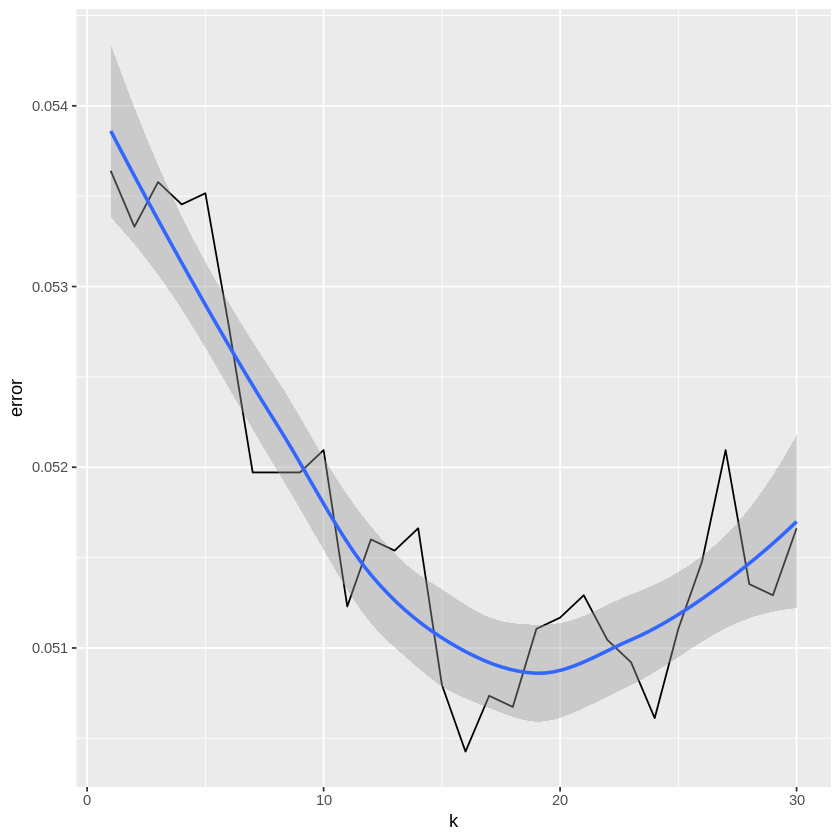

In [18]:
# INSERT CODE HERE
ggplot(output, aes(x = k, y = error)) +
  geom_line() +
  geom_smooth()

cat("k that is associated with minimum test error", output$k[which(output$error==min(output$error))])

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * *Write your response here*
>
> * I would say the best value of k is 16, it has the lowest test error. This improves our test error a lot, down to <0.05.


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [19]:
set.seed(2023)
#INSERT CODE HERE

#run knn
test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 16)

confusion_df <- data.frame(predicted = test.spec.knn,actual = d1$price_bin[test.inds])
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))
print(paste("Test error:",1-mean(confusion_df$predicted == confusion_df$actual)))


#training data pulls the "not test" rows
stand.train.preds <- cbind(scale(d1$carat[-test.inds]), scale(d1$depth[-test.inds]))
stand.train.spec <- d1$price_bin[-test.inds]
#testing data pulls the test rows
stand.test.preds <- cbind(scale(d1$carat[test.inds]), scale(d1$depth[test.inds]))

#run knn
stand.test.spec.knn <- knn(stand.train.preds, stand.test.preds, stand.train.spec, k = 16)

confusion_df <- data.frame(predicted = stand.test.spec.knn,actual = d1$price_bin[test.inds])
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))
print(paste("Test error:",1-mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    0    1
        0 9713  290
        1  533 5646

[1] "---"
[1] "Accuracy: 0.949141020887406"
[1] "Test error: 0.0508589791125943"


         actual
predicted    0    1
        0 9711  295
        1  535 5641

[1] "---"
[1] "Accuracy: 0.948708441478186"
[1] "Test error: 0.0512915585218143"


What impact did rescaling the data have on your error rate?
> * *Write response here*
>
> * It ended up slightly hurting our error rate.


**DUE:** 5pm March 20, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
